![Austin_Demography](https://cdn.vox-cdn.com/thumbor/LQNeNK1v5v7Ynu4oMmcqU810b-U=/0x0:2000x1126/1200x675/filters:focal(840x403:1160x723)/cdn.vox-cdn.com/uploads/chorus_image/image/52175125/austin_map_2000px.0.jpeg)

# Visualizing the Asian Indian population in Austin 

**_Installing the required libraries_**

In [3]:
import requests # library to handle requests
import pandas as pd # library for data analysis
import numpy as np # library to handle data in a vectorized manner
import json # library to handle JSON files
# Uncomment to install Python Geocoding ToolBox
#!pip install geopy 
# module to convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
# transforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Uncomment to install Folium
#!pip install folium
import folium 
# Uncomment to install sodapy
#!pip install sodapy
# Uncomment to install bokeh
#!pip install pandas-bokeh
# Uncomment to install GeoPandas
#!pip install geopandas
print('All necessary libraries are installed..ready to roll')

All necessary libraries are installed..ready to roll


In [2]:
# Importing data from the Austin Government website
from sodapy import Socrata
# First 2000 results, returned as JSON from API
client = Socrata("austin-energy.data.socrata.com",None)
results = client.get("vi83-tbx3",limit=2000)
# Convert to pandas DataFrame
df_results = pd.DataFrame.from_records(results)
df_results.head()

,the_geom,tractce10,sum_totpop,sum_white,sum_black,sum_hispan,sum_asian,sum_other,sum_multi,sum_hu_tot,...,sum_age62_,sum_age651,sum_age_65,sum_age75_,sum_age80_,sum_age_85,sum_famswc,sum_pop_in,sum_famili,sum_nonfam
0,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...",000101,3611.0,3130.0,39.0,276.0,90.0,9.0,67.0,2076.0,...,81.0,38.0,151.0,79.0,103.0,303.0,354.0,77.0,805.0,1010.0
1,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...",000102,2552.0,2311.0,23.0,150.0,42.0,3.0,23.0,1153.0,...,126.0,70.0,253.0,77.0,66.0,91.0,299.0,18.0,735.0,346.0
2,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...",000203,1546.0,1073.0,87.0,213.0,143.0,5.0,25.0,817.0,...,17.0,8.0,25.0,6.0,6.0,2.0,32.0,281.0,122.0,613.0
3,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...",000204,3009.0,2396.0,43.0,323.0,161.0,8.0,78.0,1750.0,...,77.0,21.0,80.0,27.0,20.0,26.0,234.0,56.0,495.0,1101.0
4,"{'type': 'MultiPolygon', 'coordinates': [[[[-9...",000205,3394.0,2333.0,110.0,676.0,162.0,24.0,89.0,2153.0,...,50.0,35.0,95.0,30.0,28.0,21.0,212.0,0.0,557.0,1439.0


In [3]:
import geopandas as gpd
# Read the GeoJson file 
census_tracts = gpd.read_file("data/Boundaries_ Austin MSA Census Tracts 2010.geojson")
print("Shape of dataframe with census_tracts",census_tracts.shape)
census_tracts.head()

Shape of dataframe with census_tracts (350, 42)


,sum_age_55,sum_age_15,sum_hu_occ,sum_multi,sum_age_18,sum_age62_,sum_other,sum_age_25,sum_age18p,sum_totpop,...,sum_age_0_,sum_hispan,sum_hu_vac,sum_famili,sum_age_45,tractce10,sum_age60_,sum_age_5_,sum_nonfam,geometry
0,203.0,59.0,1815.0,67.0,31.0,81.0,9.0,704.0,3017.0,3611.0,...,238.0,276.0,261.0,805.0,468.0,000101,72.0,160.0,1010.0,"MULTIPOLYGON (((-97.75153 30.33456, -97.75037 ..."
1,254.0,92.0,1081.0,23.0,30.0,126.0,3.0,173.0,1985.0,2552.0,...,119.0,150.0,72.0,735.0,422.0,000102,86.0,174.0,346.0,"MULTIPOLYGON (((-97.76028 30.34086, -97.75999 ..."
2,39.0,17.0,735.0,25.0,68.0,17.0,5.0,385.0,1492.0,1546.0,...,20.0,213.0,82.0,122.0,87.0,000203,18.0,9.0,613.0,"MULTIPOLYGON (((-97.73144 30.31778, -97.73174 ..."
3,170.0,51.0,1596.0,78.0,55.0,77.0,8.0,662.0,2620.0,3009.0,...,139.0,323.0,154.0,495.0,392.0,000204,41.0,115.0,1101.0,"MULTIPOLYGON (((-97.74056 30.29890, -97.74094 ..."
4,170.0,54.0,1996.0,89.0,63.0,50.0,24.0,1095.0,3054.0,3394.0,...,126.0,676.0,157.0,557.0,436.0,000205,52.0,93.0,1439.0,"MULTIPOLYGON (((-97.72808 30.32322, -97.72825 ..."


### Clean up the DataFrame ###

In [4]:
# Read the column values
census_tracts.columns.values

array(['sum_age_55', 'sum_age_15', 'sum_hu_occ', 'sum_multi',
       'sum_age_18', 'sum_age62_', 'sum_other', 'sum_age_25',
       'sum_age18p', 'sum_totpop', 'sum_age_65', 'sum_age75_',
       'sum_pop_in', 'sum_hu_tot', 'sum_ren_oc', 'sum_age80_',
       'sum_age55_', 'sum_age74_', 'sum_age_10', 'sum_age_46',
       'sum_age_35', 'sum_black', 'sum_age651', 'sum_age_85',
       'sum_own_oc', 'sum_age_20', 'sum_famswc', 'sum_age_60',
       'sum_age65_', 'sum_white', 'sum_age50_', 'sum_asian', 'sum_age_0_',
       'sum_hispan', 'sum_hu_vac', 'sum_famili', 'sum_age_45',
       'tractce10', 'sum_age60_', 'sum_age_5_', 'sum_nonfam', 'geometry'],
      dtype=object)

In [5]:
# Let's create a new DataFrame with only the needed columns
df_census_tracts = census_tracts[['tractce10','sum_totpop','sum_white','sum_black','sum_hispan','sum_asian','geometry']]
df_census_tracts.head()

,tractce10,sum_totpop,sum_white,sum_black,sum_hispan,sum_asian,geometry
0,000101,3611.0,3130.0,39.0,276.0,90.0,"MULTIPOLYGON (((-97.75153 30.33456, -97.75037 ..."
1,000102,2552.0,2311.0,23.0,150.0,42.0,"MULTIPOLYGON (((-97.76028 30.34086, -97.75999 ..."
2,000203,1546.0,1073.0,87.0,213.0,143.0,"MULTIPOLYGON (((-97.73144 30.31778, -97.73174 ..."
3,000204,3009.0,2396.0,43.0,323.0,161.0,"MULTIPOLYGON (((-97.74056 30.29890, -97.74094 ..."
4,000205,3394.0,2333.0,110.0,676.0,162.0,"MULTIPOLYGON (((-97.72808 30.32322, -97.72825 ..."


In [6]:
import pandas_bokeh
pandas_bokeh.output_notebook()
# Quick plot of the census tract boundaries
df_census_tracts.plot_bokeh(
    title="Census Tracts of Austin",
    figsize=(900,600),
    simplify_shapes=10,
    show_colorbar=False,
    color ="green",
    fill_alpha = 0.65,
    line_color = 'white', 
    line_width = 0.85,
    tile_provider="STAMEN_TERRAIN_RETINA"
)

Loading BokehJS ...

Figure(id='1002', ...)

In [7]:
# Renaming the geometry column to borders
df_census_tracts = df_census_tracts.rename(columns={'geometry':'borders'}).set_geometry('borders')
# Now, we create centroids and make it the geometry
df_census_tracts['centroid'] = df_census_tracts.centroid
df_census_tracts = df_census_tracts.set_geometry('centroid')
# Let's extract longitude & latitude values from centroid_column
df_census_tracts['Latitude'] = df_census_tracts['centroid'].apply(lambda p: p.y)
df_census_tracts['Longitude'] = df_census_tracts['centroid'].apply(lambda p: p.x)
df_census_tracts.drop(['borders','centroid'],axis = 1,inplace = True)
df_census_tracts.head(10)

,tractce10,sum_totpop,sum_white,sum_black,sum_hispan,sum_asian,Latitude,Longitude
0,000101,3611.0,3130.0,39.0,276.0,90.0,30.323164,-97.753269
1,000102,2552.0,2311.0,23.0,150.0,42.0,30.325969,-97.767229
2,000203,1546.0,1073.0,87.0,213.0,143.0,30.312628,-97.736659
3,000204,3009.0,2396.0,43.0,323.0,161.0,30.307167,-97.744464
4,000205,3394.0,2333.0,110.0,676.0,162.0,30.326162,-97.734317
5,000206,2687.0,2183.0,79.0,289.0,66.0,30.326154,-97.743515
6,000302,4939.0,3661.0,88.0,620.0,420.0,30.302560,-97.726503
7,000304,3045.0,2065.0,103.0,630.0,177.0,30.309376,-97.716906
8,000305,3223.0,2524.0,49.0,426.0,128.0,30.314872,-97.726302
9,000306,2697.0,1409.0,199.0,847.0,190.0,30.297156,-97.700273


In [8]:
# Checking the datatypes of each columns
df_census_tracts.dtypes

tractce10      object
sum_totpop     object
sum_white      object
sum_black      object
sum_hispan     object
sum_asian      object
Latitude      float64
Longitude     float64
dtype: object

In [9]:
# Converting the column data types
df_census_tracts["tractce10"] = df_census_tracts["tractce10"].astype(int)
df_census_tracts["sum_totpop"] = df_census_tracts["sum_totpop"].astype(float)
df_census_tracts["sum_white"] = df_census_tracts["sum_white"].astype(float)
df_census_tracts["sum_black"] = df_census_tracts["sum_black"].astype(float)
df_census_tracts["sum_hispan"] = df_census_tracts["sum_hispan"].astype(float)
df_census_tracts["sum_hispan"] = df_census_tracts["sum_hispan"].astype(float)
df_census_tracts.head()

,tractce10,sum_totpop,sum_white,sum_black,sum_hispan,sum_asian,Latitude,Longitude
0,101,3611.0,3130.0,39.0,276.0,90.0,30.323164,-97.753269
1,102,2552.0,2311.0,23.0,150.0,42.0,30.325969,-97.767229
2,203,1546.0,1073.0,87.0,213.0,143.0,30.312628,-97.736659
3,204,3009.0,2396.0,43.0,323.0,161.0,30.307167,-97.744464
4,205,3394.0,2333.0,110.0,676.0,162.0,30.326162,-97.734317


In [10]:
# Checking the datatypes of each columns
df_census_tracts.dtypes

tractce10       int64
sum_totpop    float64
sum_white     float64
sum_black     float64
sum_hispan    float64
sum_asian      object
Latitude      float64
Longitude     float64
dtype: object

### Let's visualize the census tracts ###

In [11]:
from geopy.geocoders import Nominatim 
address = 'Austin, Texas, USA'
geolocator = Nominatim(user_agent="austin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Austin are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Austin are 30.2711286, -97.7436995.


In [12]:
# Create map of Austin using latitude and longitude values
map_austin = folium.Map(location=[latitude, longitude], zoom_start=11)
# add markers to map
for lat, lng, label in zip(df_census_tracts['Latitude'], df_census_tracts['Longitude'], df_census_tracts['tractce10']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_austin)  
# Save map 
map_austin.save("figs/Austin_Census_Map.html")
# Display map   
HTML(map_austin._repr_html_())

# Let's select Travis County to limit our scope of analysis

**_Travis County is the fifth-most populous county in Texas. Its county seat is Austin,the capital of Texas_**

In [13]:
# The census tract data for Travis County (filtered for Asian Indians) has been downloaded from US Census website
# The dataset has been cleaned and a column tractce10 added to it
df_asian_indian = pd.read_csv('data/Travis_County_Asian_Indian_Demography.csv')
print("Shape of Travis County census_tracts for Asian Indians",df_asian_indian.shape)
df_asian_indian.head()

Shape of Travis County census_tracts for Asian Indians (42, 4)


,geo_id,tract_name,tractce10,sum_indian
0,1400000US48453000302,"Census Tract 3.02, Travis County, Texas",302,73
1,1400000US48453000401,"Census Tract 4.01, Travis County, Texas",401,81
2,1400000US48453000500,"Census Tract 5, Travis County, Texas",500,73
3,1400000US48453000601,"Census Tract 6.01, Travis County, Texas",601,15
4,1400000US48453000603,"Census Tract 6.03, Travis County, Texas",603,149


In [14]:
# Checking the datatypes of each columns
df_asian_indian.dtypes

geo_id        object
tract_name    object
tractce10      int64
sum_indian     int64
dtype: object

In [15]:
# Let's clean up the dataframe further
df_asian_indian.drop(['geo_id','tract_name'], axis = 1, inplace = True)
# Let's change the data type of indian population
df_asian_indian["sum_indian"] = df_asian_indian["sum_indian"].astype(float)
df_asian_indian.head()

,tractce10,sum_indian
0,302,73.0
1,401,81.0
2,500,73.0
3,601,15.0
4,603,149.0


In [16]:
# Let's create a new dataframe from the census_tracts 
df_census_copy = df_census_tracts.copy()
# Let's create a list of census tracts representing Travis County
tract_list = df_asian_indian['tractce10'].tolist()
# Select rows in the census dataframe using tract_list
df_new = df_census_copy[df_census_copy.tractce10.isin(tract_list)]
# Reset index
df_new.reset_index(drop=True,inplace=True)
# Merge two dataframes to create our final dataframe for Travis County
df_new2 = pd.merge(df_new,df_asian_indian,left_on='tractce10',right_on='tractce10',how='left')
# Rearrange the columns in the DataFrame
df_travis = df_new2[['tractce10','sum_totpop','sum_white','sum_black','sum_hispan','sum_indian','Latitude','Longitude']]
# Rename the columns in the DataFrame for clarity
df_travis = df_travis.rename(columns={'tractce10':'Census_Tract','sum_totpop':'Total_population','sum_white':'White','sum_black':'African_Americans','sum_hispan':'Hispanic','sum_indian':'Indian'})
df_travis.head()

,Census_Tract,Total_population,White,African_Americans,Hispanic,Indian,Latitude,Longitude
0,302,4939.0,3661.0,88.0,620.0,73.0,30.302560,-97.726503
1,401,3574.0,2446.0,128.0,445.0,81.0,30.288248,-97.725056
2,500,4518.0,3305.0,67.0,545.0,73.0,30.296063,-97.734173
3,601,9207.0,4491.0,494.0,1972.0,15.0,30.287412,-97.738044
4,603,7793.0,5121.0,149.0,972.0,149.0,30.291992,-97.746270


### Let's visualize the census tracts in Travis County

In [19]:
# Create map of Travis County using latitude and longitude values of Austin
map_travis = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(df_travis['Latitude'], df_travis['Longitude'], df_travis['Census_Tract']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_travis)  
# Save map 
map_travis.save("figs/Travis County_Census_Map.html")
# Display map   
HTML(map_travis._repr_html_())

## Define Foursquare Credentials and Version

In [20]:
# @hidden_cell
CLIENT_ID = 'JMGUGAQB13UKJUZ5XBABAQGCMHHH3LICHXH4GEU015XCHYBH' # your Foursquare ID
CLIENT_SECRET = 'K0LO1KATAYLIAYXENGLM19VPJW0POWBABAEQEGW5UAMZJ4OR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

**_Let's get the name, latitude and longitude of the first Census Tract in df_travis_**

In [21]:
tract_latitude = df_travis.loc[0, 'Latitude'] # census tract latitude value
tract_longitude = df_travis.loc[0, 'Longitude'] # census tract longitude value
tract_number = df_travis.loc[0, 'Census_Tract'] # census tract number
print('Latitude and longitude values of Census Tract # {} are {}, {}.'.format(tract_number,tract_latitude,tract_longitude))

Latitude and longitude values of Census Tract # 302 are 30.302559596563732, -97.72650340485963.


#### Let's get the top 100 venues that are in this tract within a radius of 1000 meters

In [22]:
radius = 1000
LIMIT = 100
# Create the url
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, tract_latitude, tract_longitude, VERSION, radius, LIMIT)
# Send the GET request and examine results
results = requests.get(url).json()
# Uncomment the following line to see results
#results
print('All the venues have been collected')

All the venues have been collected


### Let's define a function: get_category_type that extracts the category of each venue

In [25]:
# function get_category_type
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
from pandas.io.json import json_normalize
# Create a dataframe venues
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]
print("Shape of nearby venues of  Census tract {}: {}".format(tract_number,nearby_venues.shape))
nearby_venues.head()

Shape of nearby venues of  Census tract 302: (63, 4)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,name,categories,lat,lng
0,Antonelli's Cheese Shop,Cheese Shop,30.304378,-97.726498
1,Quack's 43rd St Bakery,Bakery,30.304731,-97.726511
2,Hyde Park Bar & Grill,American Restaurant,30.304222,-97.726705
3,Antonelli's Cheese House,Cheese Shop,30.304281,-97.726466
4,Asti Trattoria,Italian Restaurant,30.304794,-97.726176


In [27]:
# Let's check the venue categories in Census tract # 302
df_302 = pd.DataFrame(nearby_venues['categories'].value_counts(dropna=True,sort=True)).reset_index()
df_302 = df_302.rename(columns={'index':'Categories','categories':'Count'})
df_302.head()

,Categories,Count
0,Gym / Fitness Center,3
1,Grocery Store,3
2,Park,3
3,Mexican Restaurant,2
4,Italian Restaurant,2


**_There are no Indian Restaurants in this tract, most popular venues are Gym, Grocery Stores & Park_**

### Let's explore all the Census Tracts in Travis County

**_We have already explored the first Tract, let's create a function that would repeat for all Census Tracts_**

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # Uncomment the following line to print name 
        # print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        # return only relevant information for each nearby venue
        venues_list.append([(
             name, 
        #    lat, 
        #    lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Census_Tract', 
                  #'Neighborhood Latitude', 
                  #'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

In [29]:
travis_venues = getNearbyVenues(names=df_travis['Census_Tract'],
                                   latitudes=df_travis['Latitude'],
                                   longitudes=df_travis['Longitude']
                                  )
print("Finished exploring all the Census Tract venues in Travis County")

Finished exploring all the Census Tract venues in Travis County


In [30]:
print("Shape of Travis County Census Tract venues dataframe:",travis_venues.shape)
travis_venues.head(10)

Shape of Travis County Census Tract venues dataframe: (1315, 5)


,Census_Tract,Venue,Venue Latitude,Venue Longitude,Venue Category
0,302,Antonelli's Cheese Shop,30.304378,-97.726498,Cheese Shop
1,302,Quack's 43rd St Bakery,30.304731,-97.726511,Bakery
2,302,Hyde Park Bar & Grill,30.304222,-97.726705,American Restaurant
3,302,Antonelli's Cheese House,30.304281,-97.726466,Cheese Shop
4,302,Asti Trattoria,30.304794,-97.726176,Italian Restaurant
5,302,Fresh Plus Grocery,30.304841,-97.726369,Grocery Store
6,302,Mother's Cafe & Garden,30.304420,-97.726027,Vegetarian / Vegan Restaurant
7,302,Julio's,30.304624,-97.726398,Mexican Restaurant
8,302,Uncle Nicky’s,30.304278,-97.726667,Italian Restaurant
9,302,Juiceland,30.307210,-97.724873,Juice Bar


In [31]:
# Let's check the venue categories in Travis County Census Tracts
# travis_venues['Venue Category'].value_counts().nlargest(10)
df_popular_venues = pd.DataFrame(travis_venues['Venue Category'].value_counts(dropna=True,sort=True)).reset_index()
df_popular_venues = df_popular_venues.rename(columns={'index':'Categories','Venue Category':'Count'})
df_popular_venues.head(10)

,Categories,Count
0,Sandwich Place,45
1,Coffee Shop,39
2,Fast Food Restaurant,36
3,Pizza Place,34
4,Food Truck,32
5,Mexican Restaurant,29
6,Park,26
7,Hotel,25
8,Gym,25
9,Grocery Store,24


**_Sandwich Places are the most common venues, followed by Coffee Shops & Fast Food Restaurants_**

In [32]:
# Let's check the Census Tracts returned the most number of venues
# travis_venues['Census_Tract'].value_counts().nlargest(10)
df_max_venues = pd.DataFrame(travis_venues['Census_Tract'].value_counts(dropna=True,sort=True)).reset_index()
df_max_venues = df_max_venues.rename(columns={'index':'Census Tract','Census_Tract':'Count'})
df_max_venues.head(10)

,Census Tract,Count
0,1100,100
1,601,100
2,604,100
3,603,100
4,500,92
5,1849,78
6,401,71
7,302,63
8,1722,52
9,1910,52


**_Census Tract numbers 1100, 604, 603 and 601 returned the highest number of venues_**

In [30]:
# Let's check the Latitude and Longitude of the Census Tract # 1100
df_travis.loc[df_travis['Census_Tract']==1100]

,Census_Tract,Total_population,White,African_Americans,Hispanic,Indian,Latitude,Longitude
6,1100,5512.0,3871.0,445.0,806.0,71.0,30.266295,-97.742436


![Frost_Bank_Tower](https://frostbanktoweraustin.com/assets/images/cache/FrostBankTower_set4_rotator2-776d6abd7ead8695331997c2bf748d5d.jpg)

**_Census Tract #1100 is the Downtown Austin area : Returned the highest number of venues_**

**_Let's find out how many unique categories are present in all the returned venues_**

In [33]:
print('There are {} uniques categories.'.format(len(travis_venues['Venue Category'].unique())))

There are 243 uniques categories.


**_Among 243 unique venues, one of them is Indian Restaurant. By using dummy variables we can calculate mean of all venues grouped by the census tracts_**

### One hot coding to create dummy variables

In [36]:
# one hot encoding to create dummy columns
travis_onehot = pd.get_dummies(travis_venues[['Venue Category']],prefix="",prefix_sep="")
# add Census_Tract column back to dataframe
travis_onehot['Census_Tract'] = travis_venues['Census_Tract'] 
# move neighborhood column to the first column
fixed_columns = [travis_onehot.columns[-1]] + list(travis_onehot.columns[:-1])
# create the DataFrame
travis_onehot = travis_onehot[fixed_columns]
# Display travis_onehot
print("Shape of one hot encoded dataframe of venues in Travis Census Tract:",travis_onehot.shape)
travis_onehot.head()

Shape of one hot encoded dataframe of venues in Travis Census Tract: (1315, 244)


,Census_Tract,Accessories Store,Adult Boutique,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,302,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,302,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Now we group rows by Census_Tract and by taking the sum of frequency of occurrence of each category

In [37]:
travis_grouped = travis_onehot.groupby('Census_Tract').sum().reset_index()
print("Shape of Travis Census dataframe grouped by Census_Tract:",travis_grouped.shape)
travis_grouped.head()

Shape of Travis Census dataframe grouped by Census_Tract: (40, 244)


,Census_Tract,Accessories Store,Adult Boutique,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,302,0,0,1,0,1,1,0,0,0,...,1,1,0,0,0,1,0,1,0,0
1,401,0,1,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,500,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,601,0,0,1,0,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,603,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,2


## Let's check how many Indian Restaurants are in each Census Tract

In [38]:
# Create a new DataFrame for Indian Restaurants arranged in descending order
travis_new = pd.DataFrame(travis_grouped[['Census_Tract', 'Indian Restaurant']].sort_values(by=['Indian Restaurant'],ascending=False))
# Reset index of the new dataframe
travis_new.reset_index(drop=True,inplace=True)
travis_new.head(10)

,Census_Tract,Indian Restaurant
0,604,2
1,1850,2
2,1826,1
3,601,1
4,603,1
5,1819,1
6,1785,1
7,1910,1
8,1752,1
9,1756,1


**_Only 9 Census tracts have Indian Restaurants. Census Tract # 1850 and # 604 returned two restaurants each_**

## Creating a DataFrame that combines Indian Restaurants and Indian Population for each Census tract

### Cleaning the DataFrame of Indian Restaurants 

In [39]:
# Create a new DataFrame for Indian Restaurants without any sorting
travis_as_is = pd.DataFrame(travis_grouped[['Census_Tract', 'Indian Restaurant']])
# Let's remove the rows that donot return any Indian Restaurant
travis_indian = travis_as_is.loc[travis_as_is['Indian Restaurant']>0]
# Reset index of the new dataframe
travis_indian.reset_index(drop=True,inplace=True)
travis_indian.head(10)

,Census_Tract,Indian Restaurant
0,601,1
1,603,1
2,604,2
3,1752,1
4,1756,1
5,1785,1
6,1819,1
7,1826,1
8,1850,2
9,1910,1


### DataFrame of Asian Indian population for each Census Tract that has atleast one Indian restaurant

In [40]:
# Let's create a new dataframe from the census_tracts 
df_travis_copy = df_travis.copy()
# Let's create a list of census tracts representing Travis County
tract_list = travis_indian['Census_Tract'].tolist()
# Select rows in the census dataframe using tract_list
df_travis_indian = df_travis_copy[df_travis_copy.Census_Tract.isin(tract_list)]
# Reset index
df_travis_indian.reset_index(drop=True,inplace=True)
df_travis_indian.head(10)

,Census_Tract,Total_population,White,African_Americans,Hispanic,Indian,Latitude,Longitude
0,601,9207.0,4491.0,494.0,1972.0,15.0,30.287412,-97.738044
1,603,7793.0,5121.0,149.0,972.0,149.0,30.291992,-97.746270
2,604,6496.0,3842.0,138.0,852.0,181.0,30.285534,-97.747727
3,1752,3583.0,1934.0,91.0,622.0,99.0,30.357620,-97.749829
4,1756,3997.0,2959.0,104.0,402.0,46.0,30.426141,-97.769773
5,1785,4025.0,2249.0,281.0,828.0,92.0,30.444346,-97.736238
6,1819,4265.0,696.0,310.0,2820.0,43.0,30.363431,-97.702651
7,1826,2276.0,1033.0,294.0,543.0,104.0,30.402243,-97.683026
8,1850,3890.0,1594.0,522.0,1159.0,81.0,30.411905,-97.701786
9,1910,4210.0,3424.0,37.0,398.0,33.0,30.269903,-97.798175


### Merging two DataFrames on Census_Tract

In [41]:
# Merge two dataframes to create our final dataframe for Asian Indian population & restaurant for Travis County
df_combined = pd.merge(df_travis_indian,travis_indian,left_on='Census_Tract',right_on='Census_Tract',how='left')
# Rearrange the columns
df_asian_indian = df_combined[["Census_Tract","Total_population","White","African_Americans","Hispanic","Indian","Indian Restaurant","Latitude","Longitude"]]
# Rename Indian Restaurant column name
df_asian_indian = df_asian_indian.rename(columns={'Indian Restaurant':'Indian_Restaurant'})
df_asian_indian.head(10)

,Census_Tract,Total_population,White,African_Americans,Hispanic,Indian,Indian_Restaurant,Latitude,Longitude
0,601,9207.0,4491.0,494.0,1972.0,15.0,1,30.287412,-97.738044
1,603,7793.0,5121.0,149.0,972.0,149.0,1,30.291992,-97.746270
2,604,6496.0,3842.0,138.0,852.0,181.0,2,30.285534,-97.747727
3,1752,3583.0,1934.0,91.0,622.0,99.0,1,30.357620,-97.749829
4,1756,3997.0,2959.0,104.0,402.0,46.0,1,30.426141,-97.769773
5,1785,4025.0,2249.0,281.0,828.0,92.0,1,30.444346,-97.736238
6,1819,4265.0,696.0,310.0,2820.0,43.0,1,30.363431,-97.702651
7,1826,2276.0,1033.0,294.0,543.0,104.0,1,30.402243,-97.683026
8,1850,3890.0,1594.0,522.0,1159.0,81.0,2,30.411905,-97.701786
9,1910,4210.0,3424.0,37.0,398.0,33.0,1,30.269903,-97.798175


### Let's visualize the Indian Restaurants on Travis County map

In [46]:
# Create map of Travis County using latitude and longitude values of Austin
map_indian_restaurants = folium.Map(location=[latitude, longitude], zoom_start=12)
# add markers to map
for lat, lng, label in zip(df_asian_indian['Latitude'], df_asian_indian['Longitude'], df_asian_indian['Census_Tract']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_indian_restaurants)  
# Save map 
map_indian_restaurants.save("figs/Travis County_Indian_Restaurants.html")
# Display map   
HTML(map_indian_restaurants._repr_html_())

# Exploring the Data

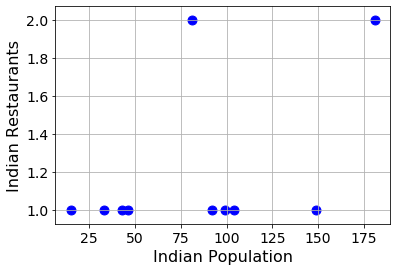

In [43]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
%matplotlib inline
# Let's create a scatter plot between Indian Restaurant & Indian Population
plt.scatter(df_asian_indian.Indian,df_asian_indian.Indian_Restaurant,s=80,c='b',marker='o' )
plt.xlabel("Indian Population",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Indian Restaurants",fontsize=16)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

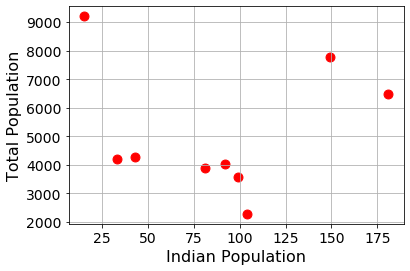

In [47]:
# Let's create a scatter plot between Indian Population & Total Population
plt.scatter(df_asian_indian.Indian,df_asian_indian.Total_population,s=80,c='r',marker='o' )
plt.xlabel("Indian Population",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Total Population",fontsize=16)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

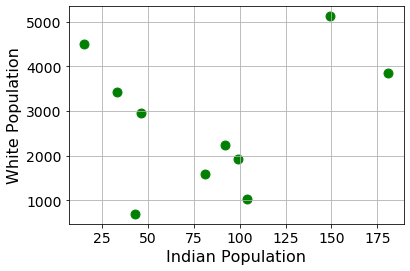

In [44]:
# Let's create a scatter plot between Indian Population & White Population
plt.scatter(df_asian_indian.Indian,df_asian_indian.White,s=80,c='g',marker='o' )
plt.xlabel("Indian Population",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("White Population",fontsize=16)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

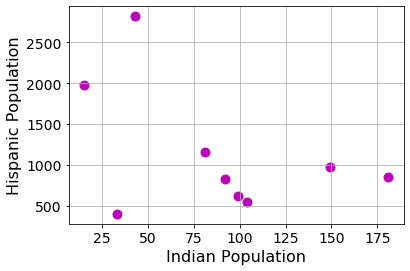

In [52]:
# Let's create a scatter plot between Indian Population & Hispanic Population
plt.scatter(df_asian_indian.Indian,df_asian_indian.Hispanic,s=80,c='m',marker='o' )
plt.xlabel("Indian Population",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Hispanic Population",fontsize=16)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

In [45]:
# Let's check the Latitude and Longitude of the Census Tract # 603
df_travis.loc[df_travis['Census_Tract']==603]

,Census_Tract,Total_population,White,African_Americans,Hispanic,Indian,Latitude,Longitude
4,603,7793.0,5121.0,149.0,972.0,149.0,30.291992,-97.74627


In [56]:
# create a plain Census_tract # 603 map
tract603_map = folium.Map(location=[30.291992,-97.74627], tiles = 'OpenStreetMap', zoom_start=12)
# add marker to map
folium.CircleMarker(
        [30.291992,-97.74627],
        radius=6,
        popup='Census Tract #603',
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tract603_map)  
# Save map 
tract603_map.save("figs/Census_Tract_603.html")
# Display map   
HTML(tract603_map._repr_html_())